# Social Defeat Analysis

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *

In [2]:
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc_csvs"
# brain_region = '#e06928'

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac_csvs"
brain_region = '#1a58af'

In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
group_data.batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac\n1-240510-085449\Notes.txt
read from t=0s to t=920.46s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac\n2-240510-075128\Notes.txt
read from t=0s to t=909.96s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac\n3-240513-072339\Notes.txt
read from t=0s to t=932.17s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac\n4-240513-084931\Notes.txt
read from t=0s to t=943.53s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac\n5-240916-092748\Notes.txt
read from t=0s to t=868.05s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Defeat\nac\n6-240916-102216\Notes.txt
read from t=0s to t=860.35s
Found Synapse note file: C:\Users\alber\OneDrive\Des

In [4]:
group_data.d_proc_processing()

Social Defeat Processing n1-240510-085449...
Social Defeat Processing n2-240510-075128...
Social Defeat Processing n3-240513-072339...
Social Defeat Processing n4-240513-084931...
Social Defeat Processing n5-240916-092748...
Social Defeat Processing n6-240916-102216...
Social Defeat Processing n7-240916-113157...


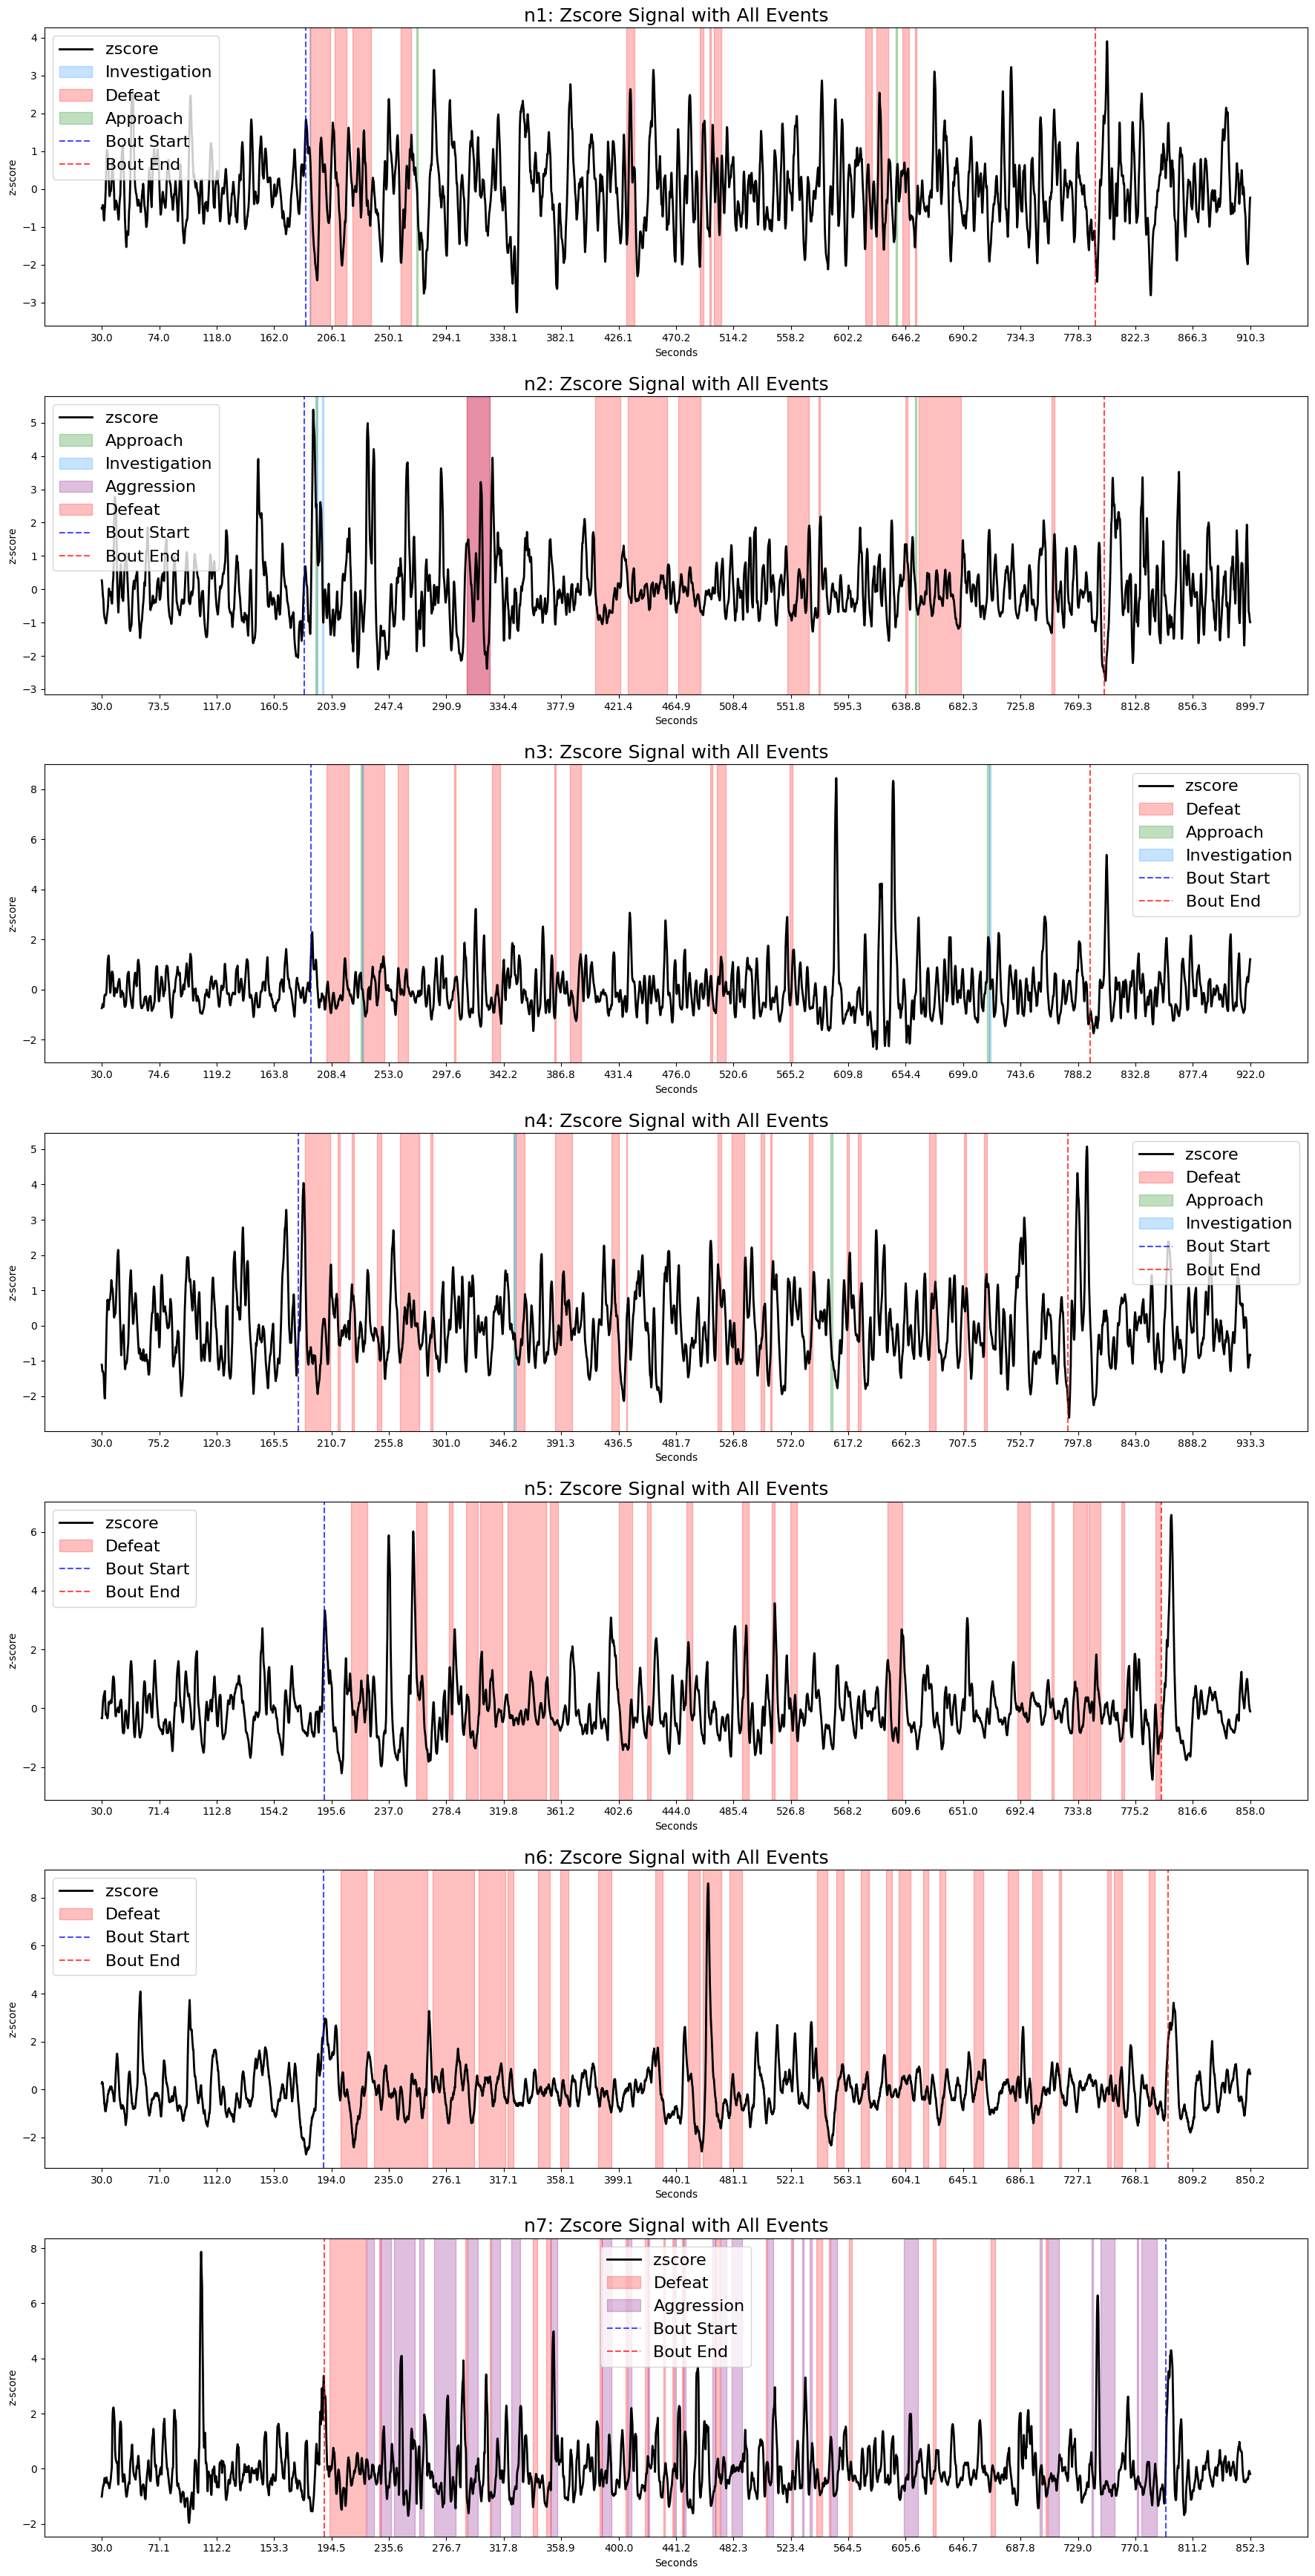

In [5]:
group_data.d_proc_plot_individual_behavior(behavior_name='all', plot_type='zscore')


In [12]:
# Define the columns representing the bouts
columns = ['bout_1']

# Extract average investigation durations
avg_inv_duration_df = extract_average_behavior_durations(group_data=group_data, bouts= columns, behavior='Defeat')

plot_y_across_bouts_gray(avg_inv_duration_df, 'Average Defeat Time Across','Investigation Time (s)', bar_color=brain_region)

c:\Users\alber\OneDrive\Documents\GitHub\PCLAB_Photometry\P2_Code\experiment_functions.py:226: RuntimeWarning: Mean of empty slice
  total_duration = np.nanmean([event['Total Duration'] for event in block_data.bout_dict[bout][behavior]])


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--],
             mask=[ True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1200x700 with 1 Axes>

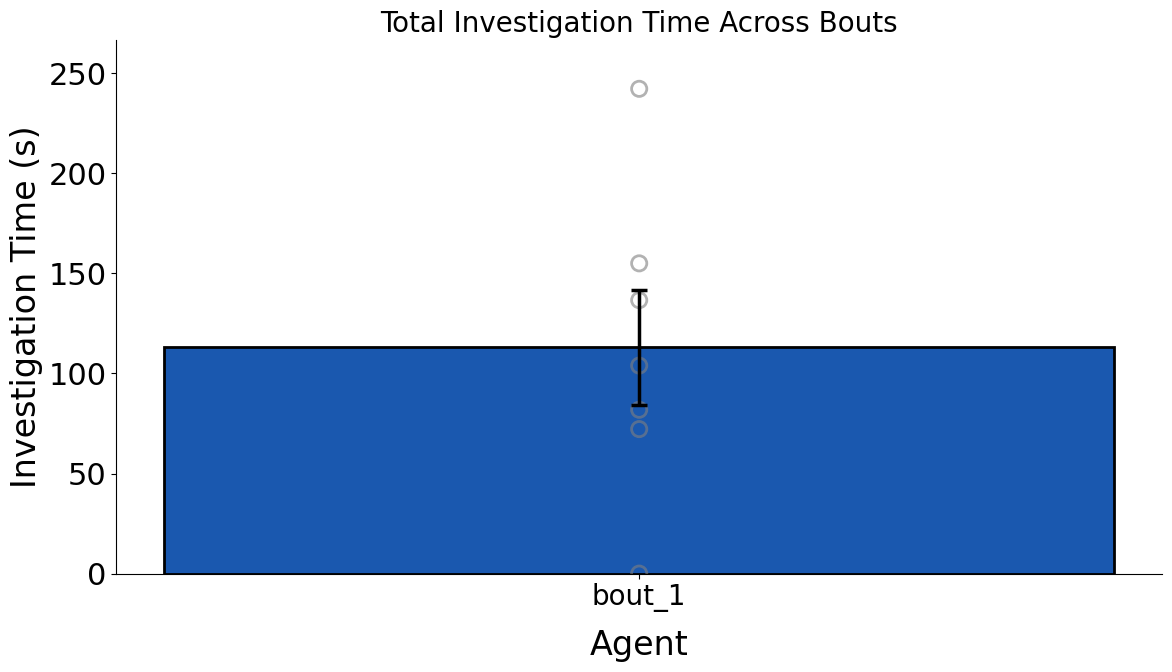

In [13]:
avg_inv_tot_duration_df = extract_total_behavior_durations(group_data=group_data, bouts=columns, behavior = 'Defeat')

# plot_y_across_bouts(avg_inv_tot_duration_df, 'Average Total Investigation Time Across Bouts','Investigation Time (s)', colors=custom_palette, custom_xtick_labels=custom_labels)
plot_y_across_bouts_gray(avg_inv_tot_duration_df, 'Total Investigation Time Across Bouts','Investigation Time (s)', bar_color=brain_region)

1st Defeat

In [15]:
inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=columns, behavior='Investigation', n=1, max_duration=5.0)

# plot_y_across_bouts_gray(inv_1st_mean_df, 'Standard z-score 1st Investigation (Max = 5.0s)','Mean DA (zscored dff)',  ylim = (-5,2),bar_color=brain_region)
inv_1st_mean_df


,bout_1
Subject,
n1,0.860860
n2,1.040087
n3,-0.002527
n4,-0.384678
n5,NaN
n6,NaN
n7,NaN


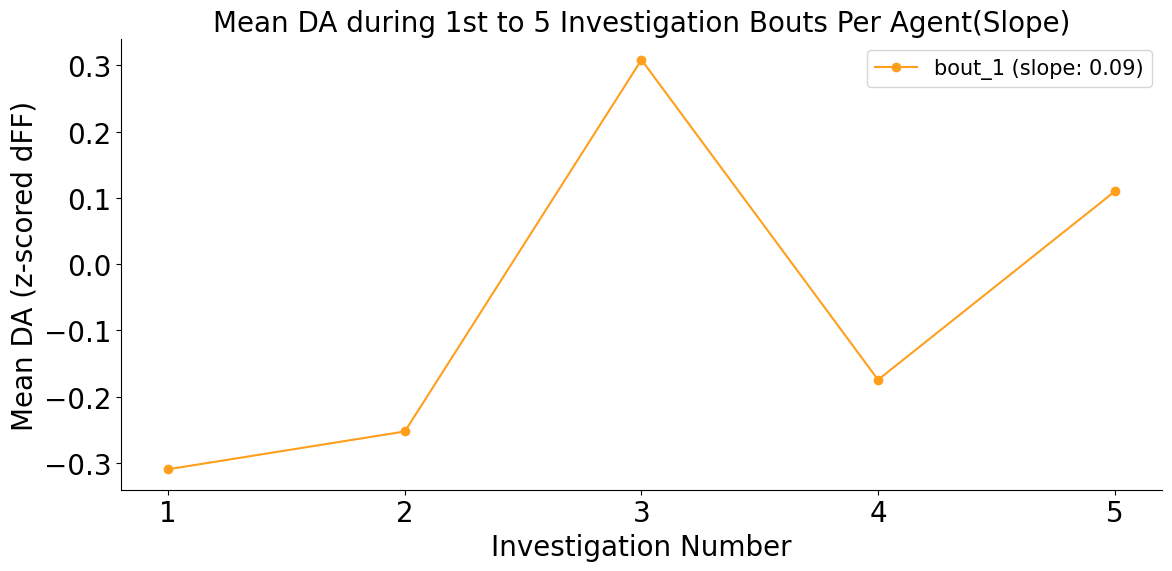

Slope for bout_1: 0.09


In [9]:
mean_da_df = extract_nth_to_mth_behavior_mean_da(group_data, columns , behavior='Defeat', n_start=1, n_end=5)
plot_meanDA_across_investigations(mean_da_df,columns, max_investigations=5, metric_type='slope',colors=custom_palette, custom_xtick_labels=['1','2','3','4','5'])

## PETH's

No occurrences of Defeat found in bout_1.
No peri-event data found for n7-240916-113157, bout_1.


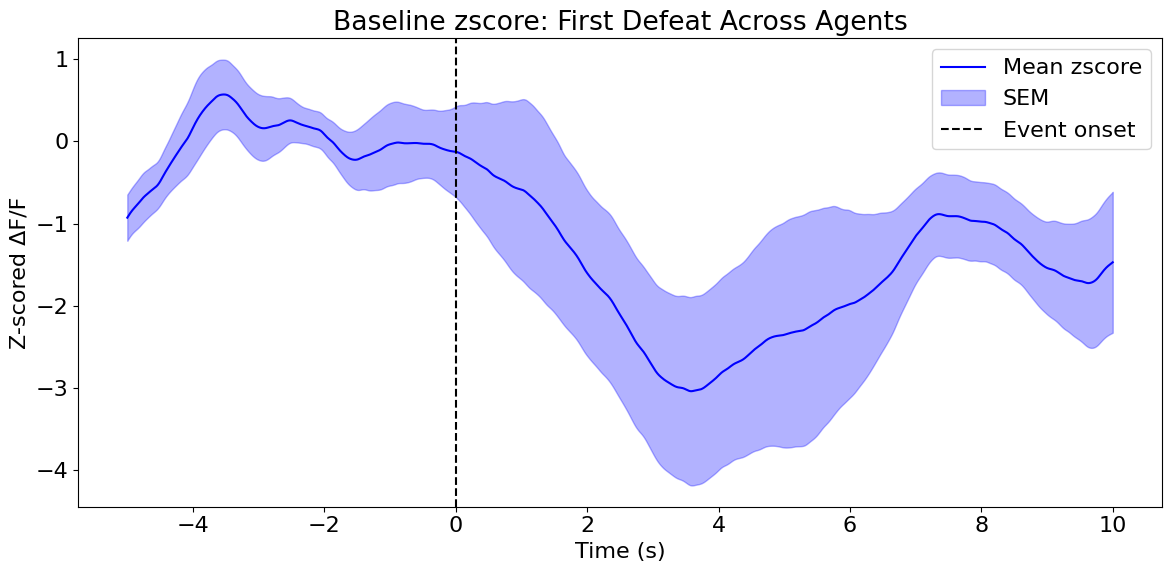

In [10]:
columns = ['bout_1']

group_data.compute_first_bout_peth_all_blocks(behavior_name='Defeat',bouts= columns, pre_time=5, post_time=10
                                              )
group_data.plot_mean_peth(signal_type='zscore', error_type='sem', title='Baseline zscore: First Defeat Across Agents')

In [11]:
df = extract_nth_behavior_mean_peth(group_data=group_data, bouts=columns,behavior='Investigation',n=1, windows=[(0, 10)])
plot_y_across_bouts_gray(df,title='Baseline zscore 1st Investigation',ylabel='Mean Value',  bar_color=brain_region,ylim=(-5,2))


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--],
             mask=[ True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1200x700 with 1 Axes>